In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import string
from typing import Optional
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

In [2]:
from navec import Navec
path = 'navec_hudlit_v1_12B_500K_300d_100q.tar'
navec = Navec.load(path)

In [3]:
data = pd.read_csv('book_new.csv', header=None)

In [4]:
data

,0
0,электронная торговля
1,локальные и глобальные экстремумы
2,перекредитование
3,робототехника
4,процессное управление
...,...
938,предприятие
939,кредитные ресурсы
940,рентабельность чистой прибыли
941,региональные вузы


In [5]:
class PhraseEmbeddings:
    def __init__(self, phrase, embbedings):
        self.phrase: string = phrase
        self.embbedings: [float] = embbedings

def calculateEmbeddingsForSplittedPhrase(phrase: [string]) -> Optional[PhraseEmbeddings]:
    embeddings: [[]] = []
        
    for word in phrase:
        tempEmbedding = navec.get(word)

        if tempEmbedding is not None:
            embeddings.append(tempEmbedding)

    if len(embeddings) != 0:
        return PhraseEmbeddings(' '.join(phrase), np.mean(embeddings, axis=0))
    else:
        # return None -> if navec could not determine the embeddings of all words of the phrase.
        return None

In [6]:
emb = []
phrases = []
i = 0
for row in data[0]:
    if len(row.split()) == 1:
        res = navec.get(row)
        if res is not None:
            emb.append(res)
            phrases.append(row)
    else:
        res = calculateEmbeddingsForSplittedPhrase(np.array(row.split()))
        if res is not None:
            emb.append(res.embbedings)
            phrases.append(row)

In [7]:
Z = np.array(phrases)

In [8]:
Z.shape

(907,)

In [9]:
X = np.array(emb)

In [10]:
X.shape

(907, 300)

In [11]:
d1 = pd.DataFrame(X)
d1.shape

(907, 300)

In [12]:
#pd.DataFrame(X).to_csv('keywords_embeddingd_25_11_21.csv', header=False, index=False)

In [13]:
k = 13
kmm = KMeans(n_clusters=k, random_state=1)
kmm.fit(X)

KMeans(n_clusters=13, random_state=1)

In [14]:
#y_pred = fcm.u
#y_pred.shape

In [15]:
clusters = kmm.cluster_centers_

In [16]:
d2 = pd.DataFrame(clusters)
d2.shape

(13, 300)

In [17]:
d3 = pd.read_csv('publication.csv', header=None)
d3.shape

(13, 300)

In [18]:
#pd.DataFrame(clusters).to_csv('cluster_centers_25_11_21.csv', header=False, index=False)

In [19]:
#topics = []

#for i_word, y in enumerate(y_pred):
 #   for i, e in enumerate(y):
  #      if e > 1/k:
   #         topics.append([Z[i_word], i, (e-1/k)*1e8])

In [20]:
#dft = pd.DataFrame(topics, columns=['Ключевая фраза','Кластер', 'Вес'])

In [21]:
#dft

In [22]:
#dft.to_csv('clustering_14_04_21.csv')

In [23]:
d1['target'] = 'Elements'
d2['target'] = 'Centers'
d3['target'] = 'Keywords'
data = d1.append(d2).append(d3)
data = data.reset_index(drop=True)
data.shape

(933, 301)

In [24]:
pca = PCA(n_components=2)
data_2d = pca.fit_transform(data.iloc[:,:-1])
data_df = pd.DataFrame(data_2d)
data_df['target'] = data['target']
data_df.shape

(933, 3)

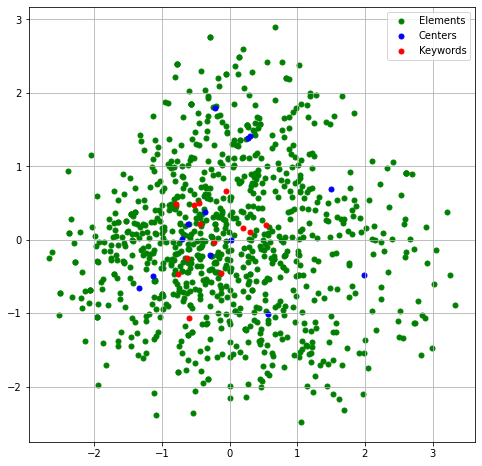

In [25]:
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1)

targets = ['Elements', 'Centers', 'Keywords']
colors = ['g', 'b', 'r']
markers = ['o', 'o', 'o']

for target, color, marker in zip(targets,colors,markers):
    indicesToKeep = data_df['target'] == target
    ax.scatter(data_df.loc[indicesToKeep, 0]
               , data_df.loc[indicesToKeep, 1]
               , c = color
               , s = 25
               , marker = marker
              )
ax.legend(targets)
ax.grid()

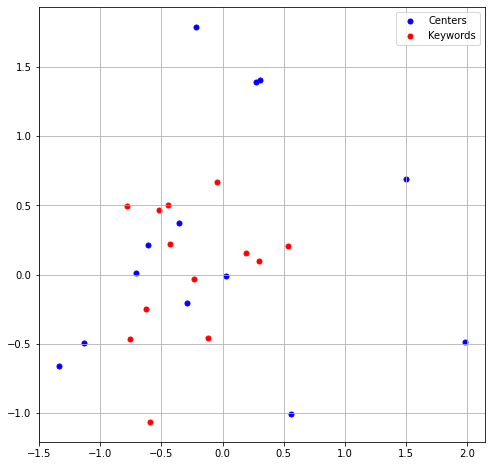

In [34]:
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1)

targets = ['Centers', 'Keywords']
colors = ['b', 'r']
markers = ['o', 'o']

for target, color, marker in zip(targets,colors,markers):
    indicesToKeep = data_df['target'] == target
    ax.scatter(data_df.loc[indicesToKeep, 0]
               , data_df.loc[indicesToKeep, 1]
               , c = color
               , s = 25
               , marker = marker
              )
ax.legend(targets)
ax.grid()

In [27]:
kmm_labels = kmm.labels_
d1['cluster'] = kmm_labels
un = pd.Series(kmm_labels).unique()
d1

,0,1,2,3,4,5,6,7,8,9,...,292,293,294,295,296,297,298,299,target,cluster
0,0.470398,0.112959,0.576481,0.284319,-0.299085,-0.224326,-0.123794,0.032323,0.204704,0.245813,...,-0.253576,-0.444092,0.272521,-0.530659,0.355826,0.271354,0.680932,-0.512406,Elements,11
1,0.049944,-0.155750,-0.163262,0.342427,0.344525,0.220851,0.145824,0.273347,0.079700,-0.416764,...,-0.085463,0.072925,0.030810,-0.426010,0.167298,0.435681,0.076551,0.146231,Elements,2
2,0.528656,0.087556,0.443964,-0.145310,-0.210084,-0.233264,0.310592,-0.061819,0.066595,0.219590,...,-0.423535,-0.439198,0.149286,0.226566,-0.068306,0.465650,0.187808,-0.547966,Elements,9
3,0.496091,-0.221561,0.102886,0.463391,-0.310837,-0.004631,-0.230791,-0.140402,0.273410,0.160696,...,-0.553314,-0.424678,0.583743,0.146704,-0.115241,-0.394309,0.059847,0.012294,Elements,10
4,0.325686,0.007507,0.568607,0.200070,0.303783,0.257717,-0.551907,-0.138469,0.155176,0.157008,...,-0.281144,-0.151199,0.285765,-0.678817,0.039957,0.485594,0.250473,0.650174,Elements,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
902,-0.039911,0.310089,-0.052410,0.690485,0.085759,-0.538098,-0.081525,-0.732197,0.128270,0.160696,...,-0.190175,-0.183027,-0.112056,0.058064,0.227423,-0.710195,0.474270,0.407580,Elements,8
903,-0.383756,0.240404,0.678290,0.307314,0.203173,-0.122892,-0.171259,-0.043626,-0.005897,-0.538416,...,0.495865,-0.275291,-0.508066,-0.477942,-0.214610,0.054864,0.455759,-0.196776,Elements,3
904,0.220746,-0.115841,-0.068942,0.492760,0.386467,0.067229,-0.147106,-0.217962,0.322650,-0.236095,...,-0.170360,0.219739,-0.176334,-0.161617,0.170335,0.026640,0.317188,0.440498,Elements,5
905,0.324901,-0.105517,-0.018070,0.002441,0.072228,0.218173,0.031727,0.002664,-0.121350,-0.336530,...,0.046304,0.116934,0.010155,-0.234406,-0.200940,0.259402,-0.085605,0.100587,Elements,3


In [28]:
pca2 = PCA(n_components=2)
d1_2d = pca2.fit_transform(d1.iloc[:,:-2])
d1_df = pd.DataFrame(d1_2d)
d1_df['cluster'] = d1['cluster']
d1_df

,0,1,cluster
0,0.993817,-0.260955,11
1,-0.499884,0.240693,2
2,2.792033,-0.807055,9
3,-1.448811,0.288232,10
4,1.024673,1.840992,4
...,...,...,...
902,0.108733,2.416259,8
903,-0.139791,1.613365,3
904,0.150237,0.782924,5
905,0.784476,0.757715,3


In [29]:
un

array([11,  2,  9, 10,  4,  3,  5, 12,  1,  8,  6,  7,  0])

In [30]:
kmm_cluster_labels = kmm.predict(clusters)
d2['cluster'] = kmm_cluster_labels
d2

,0,1,2,3,4,5,6,7,8,9,...,292,293,294,295,296,297,298,299,target,cluster
0,-0.043958,0.198178,-0.004119,0.395353,0.030872,0.226213,-0.145709,-0.071883,0.230614,0.140340,...,-0.029378,-0.189107,0.330802,-0.401223,-0.262590,0.111565,0.458182,0.592877,Centers,0
1,0.035649,0.030506,-0.103990,0.013977,-0.114839,0.244576,-0.093401,0.107809,0.076731,0.247257,...,-0.149185,0.047913,0.235149,-0.138552,-0.067530,0.081365,0.264425,0.230328,Centers,1
2,0.078062,0.085254,-0.099008,0.243644,0.088558,0.193595,0.016571,0.173081,0.023014,-0.179443,...,0.068413,0.040560,-0.063934,-0.229099,-0.019599,0.305010,0.238988,0.224319,Centers,2
3,-0.045765,0.242696,0.083476,0.270023,0.140147,-0.097692,-0.072046,0.006370,-0.017715,-0.177062,...,0.112258,0.015333,-0.277686,-0.308358,-0.126223,0.059471,0.198156,0.123116,Centers,3
4,0.046163,-0.057393,0.234095,0.132351,-0.087152,-0.148804,-0.084959,-0.062194,0.263712,0.159431,...,0.016445,-0.118294,0.010362,-0.345792,-0.032943,0.019000,0.177469,0.276702,Centers,4
5,0.148519,0.048790,-0.106585,-0.028038,-0.144661,0.298523,0.039418,0.021183,0.122340,0.055940,...,0.074822,0.224518,-0.028177,-0.124830,-0.130876,0.111941,0.416253,0.314376,Centers,5
6,0.298331,-0.001616,0.345572,0.129884,0.074128,0.158234,0.022986,-0.098234,0.167308,0.106877,...,0.040148,0.075811,0.192296,-0.238324,0.179889,0.075283,0.218493,0.403985,Centers,6
7,0.296037,-0.018342,0.649552,0.277333,-0.080353,0.040069,-0.290086,-0.068315,0.389917,-0.247214,...,-0.013494,0.025421,-0.050543,0.234108,0.223128,-0.000346,-0.002639,-0.046647,Centers,7
8,0.218489,0.159234,0.093180,0.421586,0.119275,0.013747,-0.181376,-0.343775,0.226715,0.027227,...,0.027643,0.021314,-0.216547,-0.077004,0.088357,-0.205411,0.403605,0.385065,Centers,8
9,0.143695,0.306715,0.257316,-0.054389,0.033242,-0.133419,0.053793,0.001113,0.240110,0.158474,...,-0.021631,-0.099050,-0.033728,0.013336,-0.100416,0.344699,0.249794,-0.119383,Centers,9


In [31]:
d2_2d = pca2.fit_transform(d2.iloc[:,:-2])
d2_df = pd.DataFrame(d2_2d)
d2_df['cluster'] = d2['cluster']
d2_df

,0,1,cluster
0,-2.319947,-0.684130,0
1,-0.849046,0.228242,1
2,-0.561444,-0.312990,2
3,0.108762,-0.220909,3
4,-0.100561,-0.386190,4
5,-0.617544,-0.388870,5
6,-0.891794,-0.809844,6
7,3.626372,-0.796608,7
8,1.548586,0.660981,8
9,-0.075588,-0.745006,9


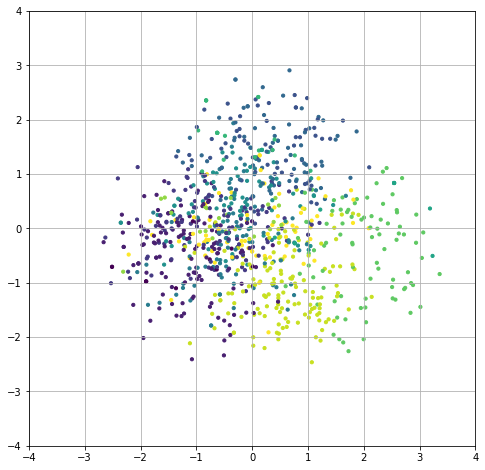

In [32]:
fig = plt.figure(figsize = (8,8))
plt.scatter(d1_df[0], d1_df[1], c = d1_df['cluster'], s = 10)
plt.xlim([-4,4])
plt.ylim([-4,4])
plt.grid()
plt.show()

11


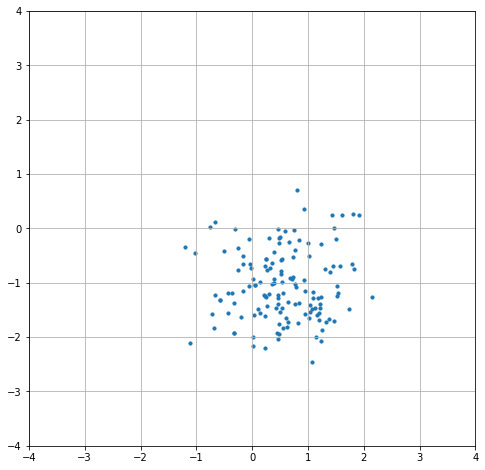

2


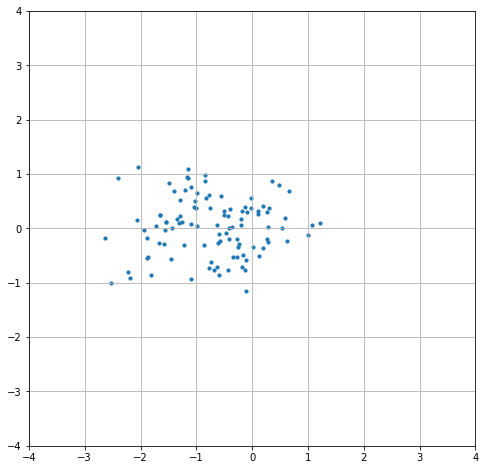

9


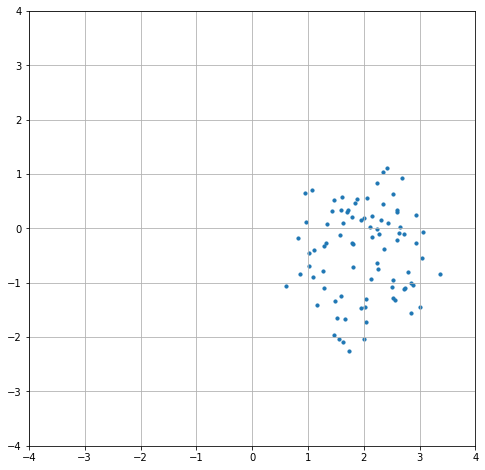

10


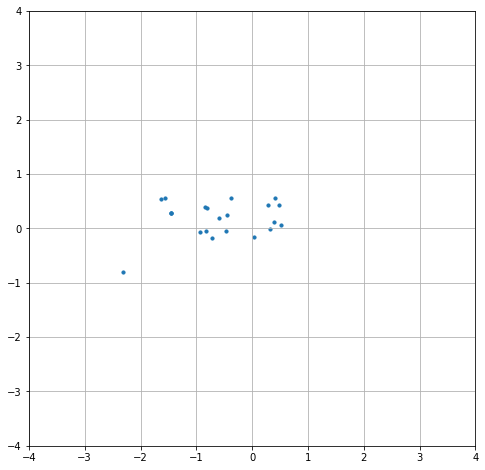

4


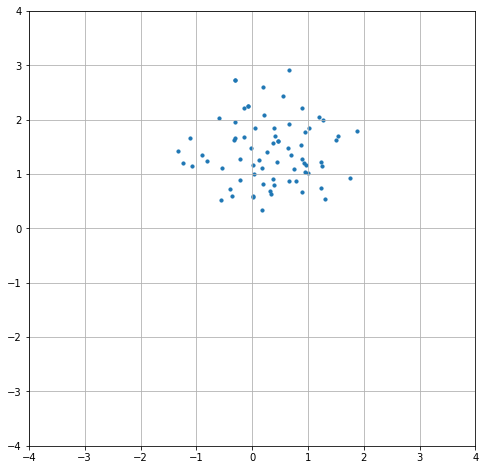

3


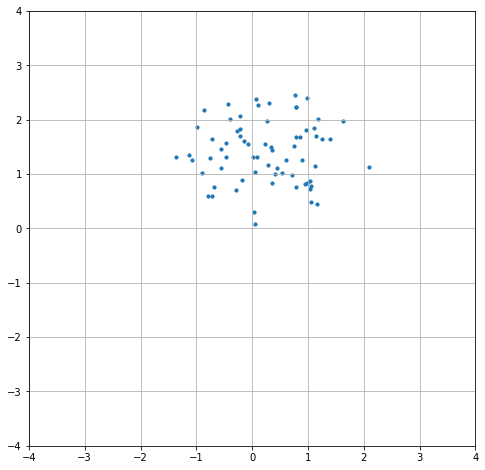

5


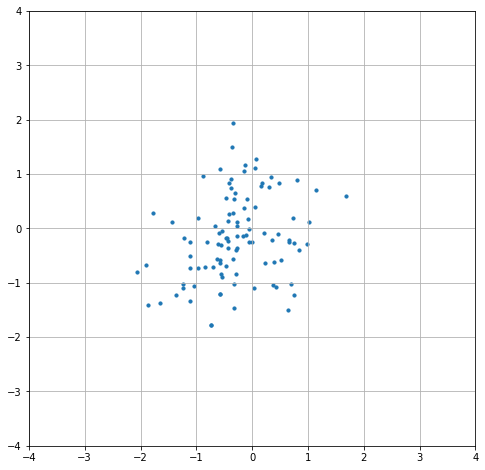

12


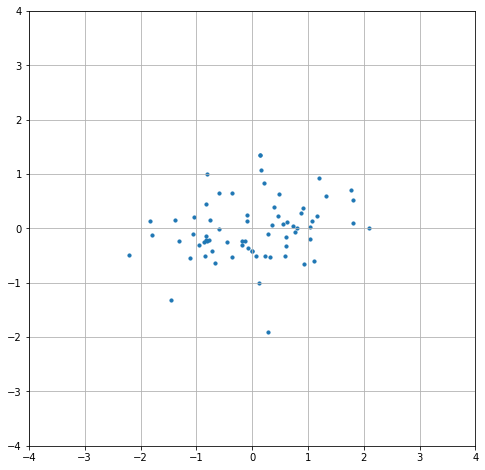

1


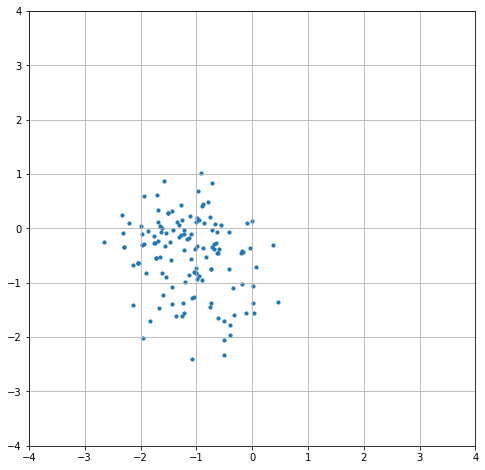

8


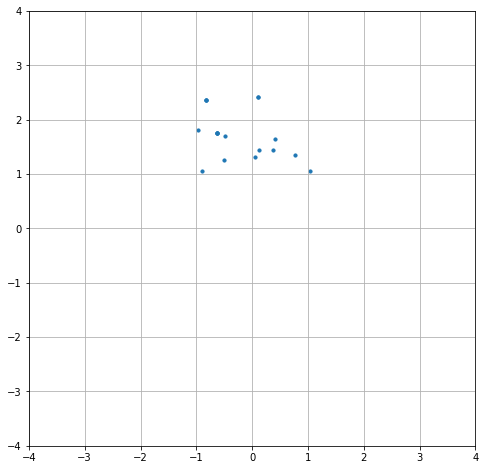

6


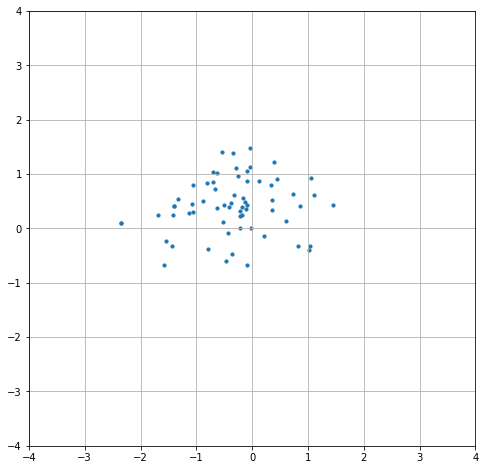

7


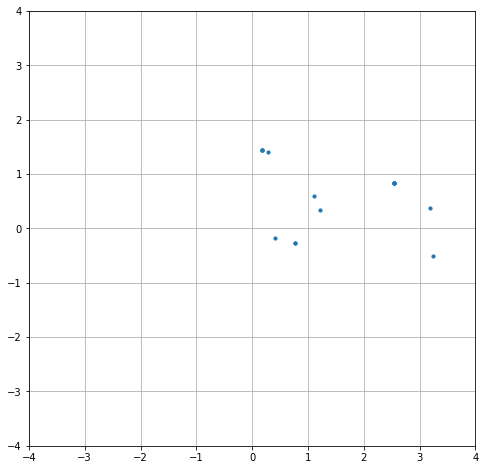

0


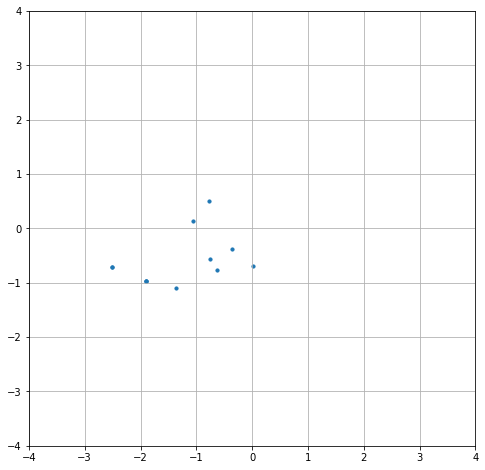

In [33]:
for cluster in un:
    print(cluster)
    fig = plt.figure(figsize = (8,8))
    plt.scatter(d1_df[d1_df['cluster']==cluster][0], d1_df[d1_df['cluster']==cluster][1], s = 10)
    plt.xlim([-4,4])
    plt.ylim([-4,4])
    plt.grid()
    plt.show()